In [1]:
# write analog input onto DSC110 toptica scan
import sys
sys.path.append("..")
import nidaqmx
import numpy as np
import time
from LowLevelModules.Confocal import *
from LowLevelModules.GeneralFunctions import *
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from pymeasure.instruments.thorlabs import ThorlabsPM100USB
from scipy.optimize import curve_fit

from datetime import datetime

from LowLevelModules.NIdaq import *
import pandas as pd

In [2]:
import importlib

In [7]:
import LowLevelModules
importlib.reload(LowLevelModules.Confocal)
from LowLevelModules.Confocal import *

In [3]:
# intialize power meter and wavemeter
PM100Addr = 'USB0::0x1313::0x8078::P0021814::INSTR'
PM = ThorlabsPM100USB(PM100Addr)

In [4]:
print(f'Thorlabs power (uW) = {PM.measure_power(737)*1e6:.0f}')

Thorlabs power (uW) = -0


In [2]:
shutter_ctrl_terminal ='/Dev1/port0/line1'
def shutter_ctrl_write(v):
    """write a digital signal to shutter
    maximum frequency of operation - 10 Hz (continuous)
    40 Hz - burst - 4 sec maximum with 1 minute minimum between burst
    """
    with nidaqmx.Task() as do_task:
        do_task.do_channels.add_do_chan(shutter_ctrl_terminal)
        do_task.write(v)       

In [3]:
shutter_ctrl_write(True)

## thorlabs power meter read 24 ms

In [13]:
nrepeat=5

ts = time.perf_counter()
for i in list(range(nrepeat)):
    try:
        p0=PM.measure_power(737)
    except:
        break

ttot = time.perf_counter()-ts
print(f'time (s) = {ttot/nrepeat:.9f}')

time (s) = 0.024082540


# Bristol read time 102 ms (wavelength + power)

In [3]:
bristol = Bristol()

In [4]:
currentLambda,currentPower = bristol.readBristol()
print(f'Wavelength (nm-air) = {currentLambda: .4f}')
print(f'Bristol power (mW) = {currentPower: .3f}')

Wavelength (nm-air) =  736.9095
Bristol power (mW) =  0.926


In [23]:
nrepeat=5

ts = time.perf_counter()
for i in list(range(nrepeat)):
    try:
        currentLambda,currentPower = bristol.readBristol()
    except:
        break

ttot = time.perf_counter()-ts
print(f'time (s) = {ttot/nrepeat:.9f}')

time (s) = 0.101925920


# FP_scan around 120 ms
# sometimes it got stuck (5-10% of the time) can take multiple seconds

In [34]:
nrepeat=2

ts = time.perf_counter()
for i in list(range(nrepeat)):
    try:
        t0_this,v_ao_scan_this,aiV_this = FP_scan()
    except:
        break

ttot = time.perf_counter()-ts
print(f'time (s) = {ttot/nrepeat:.9f}')

time (s) = 0.119487150


<font size="10">Monitor wavelength</font>

<IPython.core.display.Javascript object>


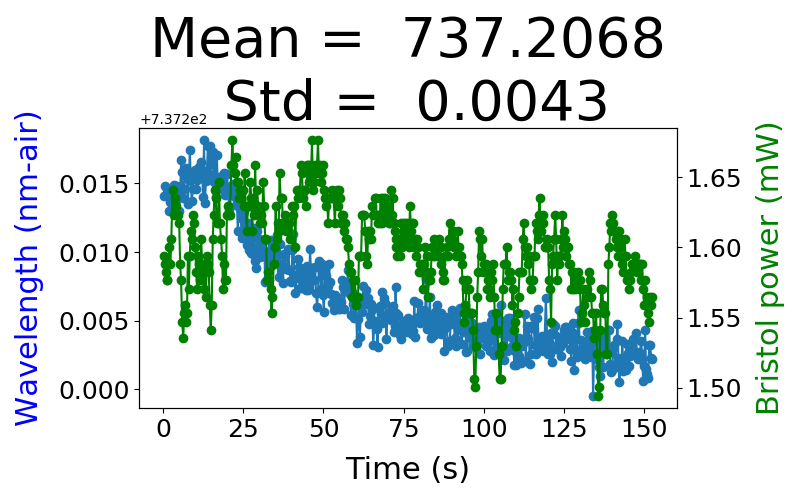

In [7]:
%matplotlib notebook
a,b,c=monitor_wavelength(bristol)

<font size="6">Scan laser piezo voltage</font>

In [5]:
help(scan_laser_piezo)

Help on function scan_laser_piezo in module LowLevelModules.Confocal:

scan_laser_piezo(bristol, PM, vstart=-5, vend=5, scanpts=50, PowerMeterOn=False, save_data=True, lasercurrent=nan, potreading=nan, PDOn=False)
    scan laser piezo voltage and monitor wavelength and power
    scan laser frequency in discrete steps
    software timed



<IPython.core.display.Javascript object>


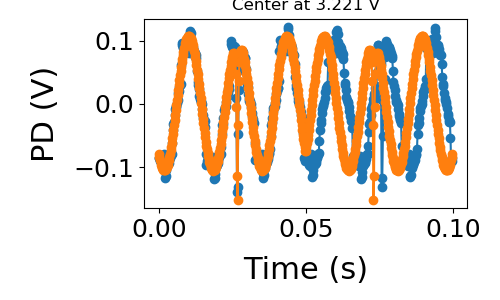

<IPython.core.display.Javascript object>


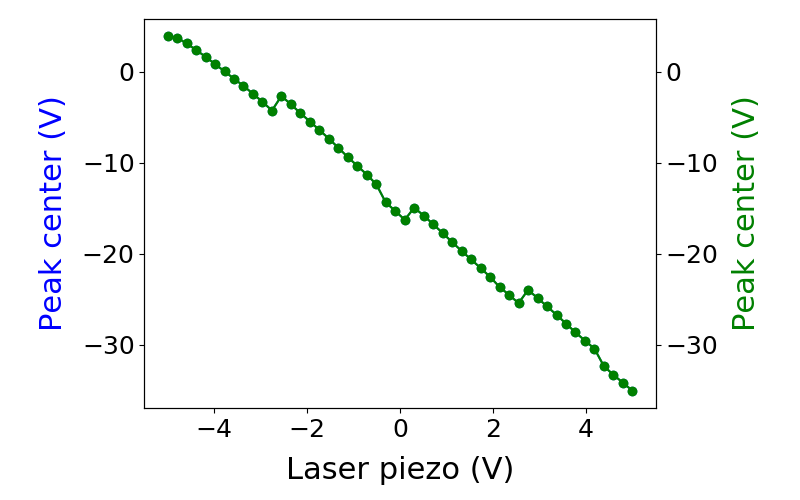

<IPython.core.display.Javascript object>


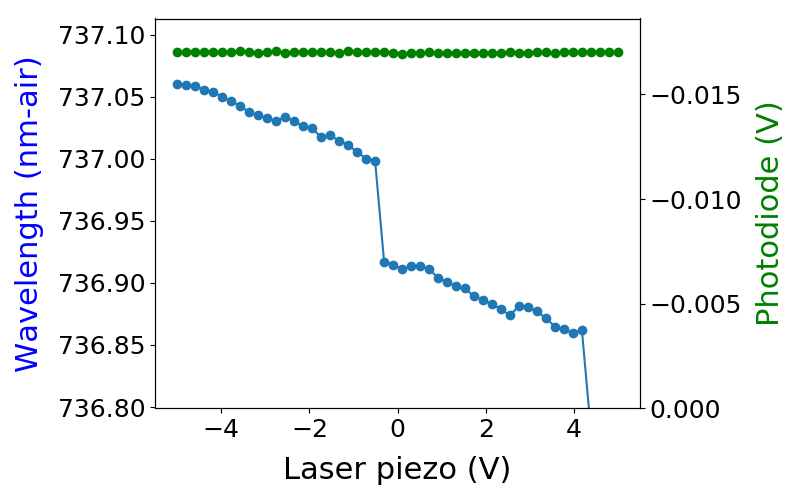

C:\data\200223\TopticaScan\TopticaScan_214226.txt


In [9]:
%matplotlib notebook
scan_laser_piezo(bristol,np.nan,-5,5,50,False,True,56,65,True)

# Check scans

In [3]:
directory = r'C:\data\200210\TopticaScan'
# filename = 'TopticaScan_190410.txt'

usersDf1 = pd.read_csv(directory+'\\' + 'TopticaScan_071904' + '.txt', skiprows=5,delimiter =' ',header=None).values
usersDf2 = pd.read_csv(directory+'\\' + 'TopticaScan_072018' + '.txt', skiprows=5,delimiter =' ',header=None).values
usersDf3 = pd.read_csv(directory+'\\' + 'TopticaScan_072124' + '.txt', skiprows=5,delimiter =' ',header=None).values
usersDf4 = pd.read_csv(directory+'\\' + 'TopticaScan_072237' + '.txt', skiprows=5,delimiter =' ',header=None).values

(736.7, 737.15)

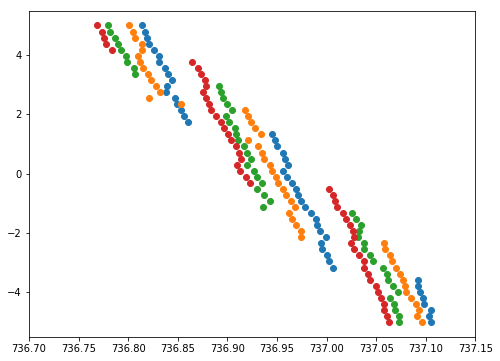

In [4]:
fig=plt.figure(figsize=(8,6))

# plt.plot(usersDf1[:,0],usersDf1[:,1],marker='o',linestyle="None")
# plt.plot(usersDf2[:,0],usersDf2[:,1],marker='o',linestyle="None")
# plt.plot(usersDf3[:,0],usersDf3[:,1],marker='o',linestyle="None")
# plt.plot(usersDf4[:,0],usersDf4[:,1],marker='o',linestyle="None")

plt.plot(usersDf1[:,1],usersDf1[:,0],marker='o',linestyle="None")
plt.plot(usersDf2[:,1],usersDf2[:,0],marker='o',linestyle="None")
plt.plot(usersDf3[:,1],usersDf3[:,0],marker='o',linestyle="None")
plt.plot(usersDf4[:,1],usersDf4[:,0],marker='o',linestyle="None")
# plt.plot(usersDf5[:,1],usersDf5[:,0],marker='o',linestyle="None")
# plt.plot(usersDf6[:,1],usersDf6[:,0],marker='o',linestyle="None")
# plt.plot(usersDf7[:,1],usersDf7[:,0],marker='o',linestyle="None")
# plt.plot(usersDf8[:,1],usersDf8[:,0],marker='o',linestyle="None")
plt.xlim(736.7,737.15)

# Fit wavelength to a piecewise linear function

In [102]:
import LowLevelModules
importlib.reload(LowLevelModules.Confocal)
from LowLevelModules.Confocal import *

<IPython.core.display.Javascript object>


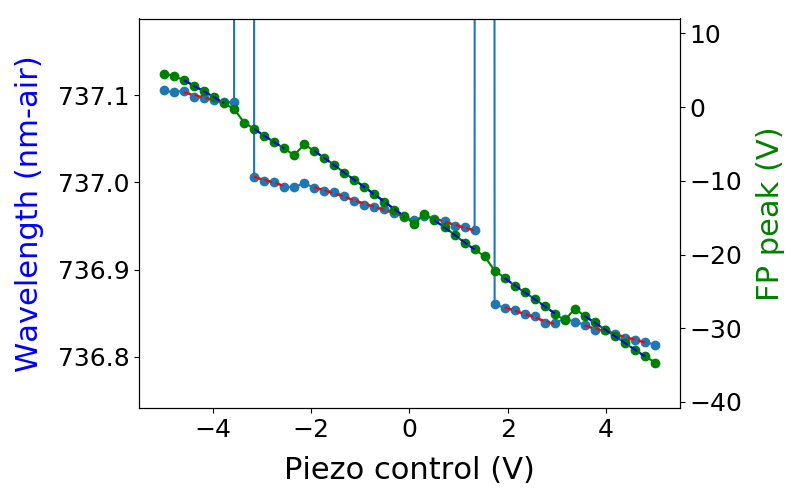

 737.1066, 737.0881, 0.0185,-4.796,-3.571,-0.0151,737.034
 737.0100, 736.9925, 0.0175,-3.367,-2.347,-0.0171,736.952
 736.9984, 736.9571, 0.0414,-2.143, 0.102,-0.0184,736.959
 736.9618, 736.9414, 0.0205, 0.306, 1.531,-0.0167,736.967
 736.8606, 736.8336, 0.0270, 1.735, 3.163,-0.0189,736.893
 736.8391, 736.8132, 0.0259, 3.367, 5.000,-0.0159,736.893


<IPython.core.display.Javascript object>


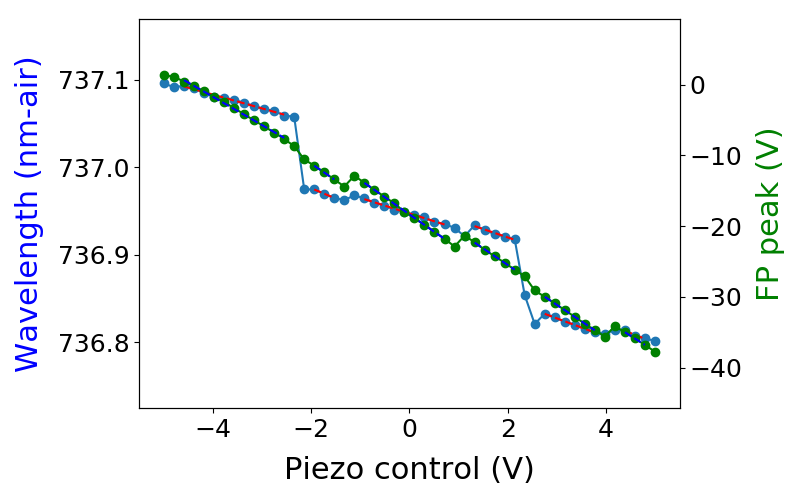

 737.0956, 737.0569, 0.0387,-4.796,-2.347,-0.0158,737.020
 736.9794, 736.9599, 0.0195,-2.143,-1.327,-0.0239,736.928
 736.9671, 736.9309, 0.0362,-1.122, 0.918,-0.0178,736.947
 736.9366, 736.9131, 0.0235, 1.122, 2.347,-0.0192,736.958
 736.8366, 736.8067, 0.0298, 2.551, 3.980,-0.0209,736.890
 736.8177, 736.7991, 0.0186, 4.184, 5.000,-0.0228,736.913


<IPython.core.display.Javascript object>


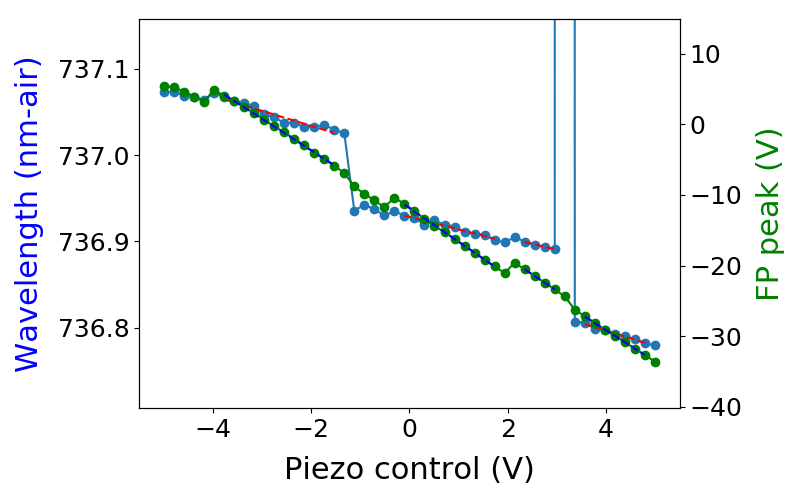

 737.0682, 737.0221, 0.0461,-3.980,-1.327,-0.0174,736.999
 736.9330, 736.9003, 0.0327,-0.306, 1.939,-0.0145,736.929
 736.9022, 736.8881, 0.0141, 2.143, 3.163,-0.0138,736.932
 736.8080, 736.7788, 0.0292, 3.367, 5.000,-0.0179,736.868


<IPython.core.display.Javascript object>


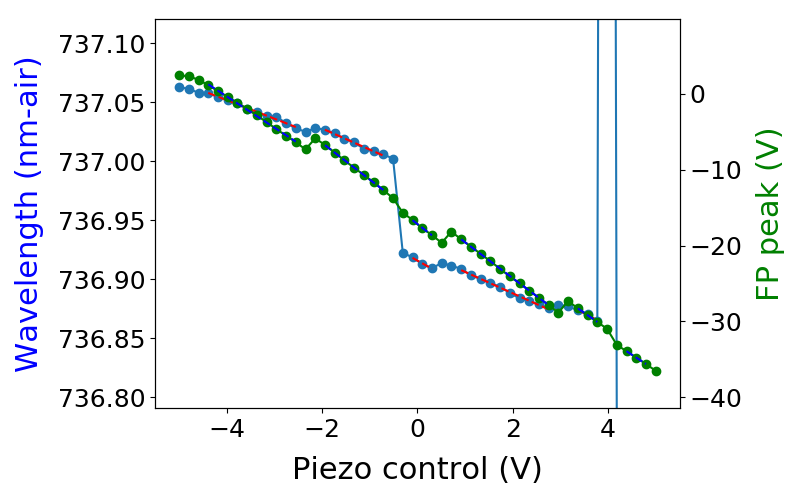

 737.0613, 737.0259, 0.0354,-4.592,-2.347,-0.0158,736.989
 737.0305, 737.0013, 0.0292,-2.143,-0.510,-0.0179,736.992
 736.9228, 736.9043, 0.0184,-0.306, 0.510,-0.0226,736.916
 736.9115, 736.8707, 0.0408, 0.714, 2.959,-0.0182,736.924
 736.8786, 736.8607, 0.0179, 3.163, 3.980,-0.0219,736.948
 736.7799, 736.7713, 0.0086, 4.184, 5.000,-0.0105,736.824


In [17]:
%matplotlib notebook
directory = r'C:\data\200210\TopticaScan'
fileprefix = 'TopticaScan_071904'

lpLR1,mode_hop_free1=fit_wavelength_segments(directory,'TopticaScan_071904')
lpLR2,mode_hop_free2=fit_wavelength_segments(directory,'TopticaScan_072018')
lpLR3,mode_hop_free3=fit_wavelength_segments(directory,'TopticaScan_072124')
lpLR4,mode_hop_free4=fit_wavelength_segments(directory,'TopticaScan_072237')

In [ ]:
# output mode hop free tuning range
# 1) separate
# 2) on the same line

In [ ]:
marker='ro'

In [56]:
marker[0]

'r'

In [59]:
def plot_intervals(ax,mode_hop_free,marker,ind,step=None):
    if step is None:
        step = 1/mode_hop_free.shape[0]
    for i,v in enumerate(mode_hop_free):
        ax.plot(mode_hop_free[i,0:2],[ind+i*step,ind+i*step],marker,markersize=4)
        ax.annotate(f'{mode_hop_free[i,4]:.3f}, {mode_hop_free[i,3]:.3f}',(mode_hop_free[i,0],ind+i*step+0.3),fontsize=8,color=marker[0],
                     bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.6))
#         ax.annotate(f'{mode_hop_free[i,4]:.3f}',(mode_hop_free[i,1],ind+i*step+0.3),fontsize=8,color='black',
#                      bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.6))

<IPython.core.display.Javascript object>


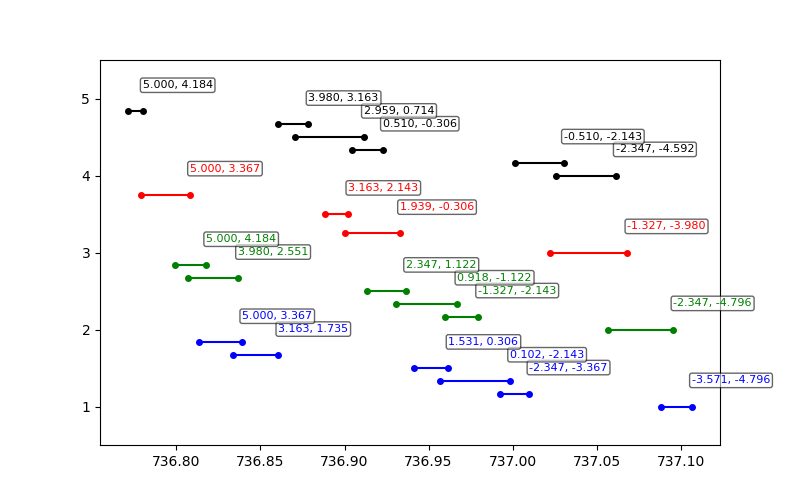

(0.5, 5.5)

In [60]:
fig = plt.figure(figsize=(8, 5))

ax1 = fig.add_subplot(111)

plot_intervals(ax1,mode_hop_free1,'bo-',1)
plot_intervals(ax1,mode_hop_free2,'go-',2)
plot_intervals(ax1,mode_hop_free3,'ro-',3)
plot_intervals(ax1,mode_hop_free4,'ko-',4)
ax1.set_ylim(0.5,5.5)

<IPython.core.display.Javascript object>


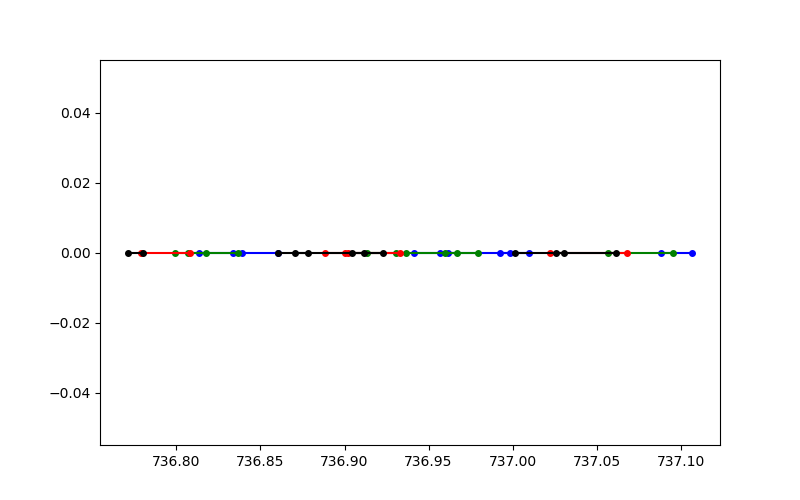

In [37]:
fig = plt.figure(figsize=(8, 5))

ax1 = fig.add_subplot(111)

plot_intervals(ax1,mode_hop_free1,'bo-',0,0)
plot_intervals(ax1,mode_hop_free2,'go-',0,0)
plot_intervals(ax1,mode_hop_free3,'ro-',0,0)
plot_intervals(ax1,mode_hop_free4,'ko-',0,0)

<IPython.core.display.Javascript object>


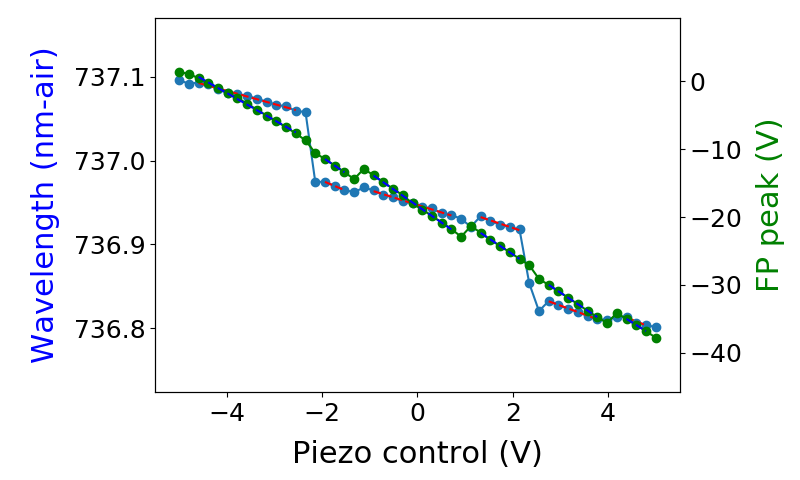

[-1  0 13 18 29 36 44 49]
 737.0924, 737.0601, 0.0323,-4.592,-2.551,-0.0158,737.020
 736.9745, 736.9648, 0.0097,-1.939,-1.531,-0.0239,736.928
 736.9635, 736.9345, 0.0290,-0.918, 0.714,-0.0178,736.947
 736.9327, 736.9170, 0.0156, 1.327, 2.143,-0.0192,736.958
 736.8323, 736.8110, 0.0213, 2.755, 3.776,-0.0209,736.890
 736.8130, 736.8037, 0.0093, 4.388, 4.796,-0.0228,736.913


In [56]:
%matplotlib notebook
directory = r'C:\data\200210\TopticaScan'
fileprefix = 'TopticaScan_072018'

fit_wavelength_segments(directory,fileprefix)

<IPython.core.display.Javascript object>


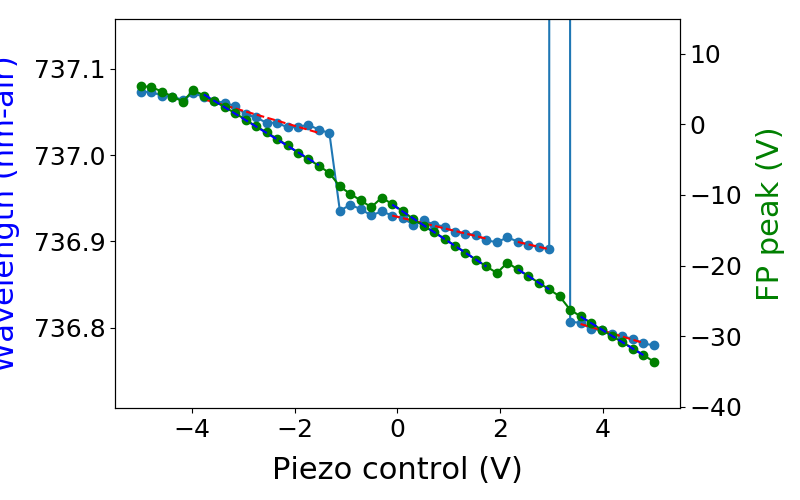

[-1  0  4 18 22 34 40 49]
 737.0647, 737.0257, 0.0390,-3.776,-1.531,-0.0174,736.999
 736.9300, 736.9033, 0.0267,-0.102, 1.735,-0.0145,736.929
 736.8994, 736.8909, 0.0085, 2.347, 2.959,-0.0138,736.932
 736.8044, 736.7824, 0.0219, 3.571, 4.796,-0.0179,736.868


In [57]:
%matplotlib notebook
directory = r'C:\data\200210\TopticaScan'
fileprefix = 'TopticaScan_072124'

fit_wavelength_segments(directory,fileprefix)

<IPython.core.display.Javascript object>


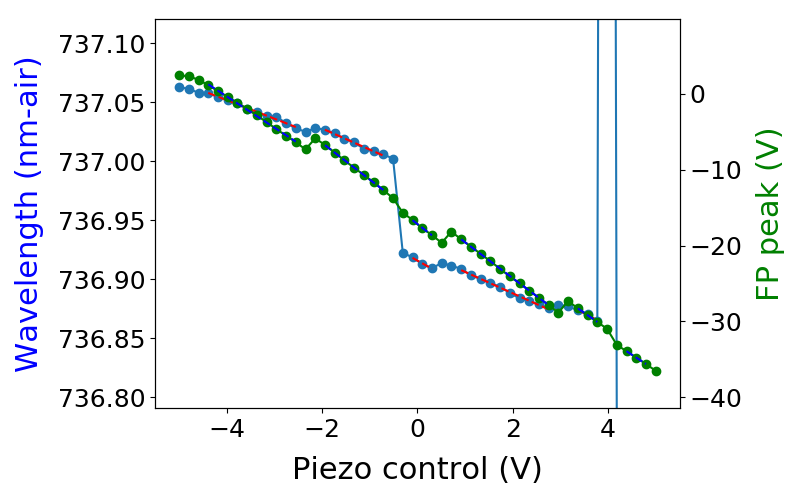

[-1  0  1 13 22 27 39 44 49]
 737.0581, 737.0291, 0.0289,-4.388,-2.551,-0.0158,736.989
 737.0268, 737.0049, 0.0219,-1.939,-0.714,-0.0179,736.992
 736.9182, 736.9090, 0.0092,-0.102, 0.306,-0.0226,736.916
 736.9078, 736.8744, 0.0333, 0.918, 2.755,-0.0182,736.924
 736.8741, 736.8652, 0.0089, 3.367, 3.776,-0.0219,736.948
 736.7778, 736.7735, 0.0043, 4.388, 4.796,-0.0105,736.824


In [61]:
%matplotlib notebook
directory = r'C:\data\200210\TopticaScan'
fileprefix = 'TopticaScan_072237'

fit_wavelength_segments(directory,fileprefix)

In [61]:
0.056*552

30.912